# Devoir 1

In [3]:
import statistics

import numpy as np
import matplotlib.pyplot as plt
from black import best_effort_relative_path

ModuleNotFoundError: No module named 'black'

## Les bandits stochastiques

### [10 points] Les environnements de bandits stochastiques

#### Récompenses de distributions de Bernoulli

Complétez le code suivant pour implémenter un simulateur de bandit stochastique à $k$ actions avec récompenses générées par des distributions de Bernoulli. Votre classe doit recevoir en entrée les probabilités de succès de chaque action ainsi qu'un germe aléatoire permettant de fixer la réalisation de l'instance. La fonction _play_ doit échantillonner et retourner une récompense pour l'action demandée.

In [7]:
class BernoulliBandit:
    
    def __init__(self, probabilities, seed=None):
        self.probabilities = probabilities
        self.rng = np.random.default_rng(seed)

    def play(self, action):
        return self.rng.binomial(1, self.probabilities[action], 1)

Générez une instance de votre environnement avec la configuration $\boldsymbol \mu = (0.7, 0.6, 0.5)$.

In [8]:
seed = 22
bernoulliBandit = BernoulliBandit(np.array([0.7, 0.6, 0.5]), seed)
print(bernoulliBandit.play(0))

[1]


Montrez que votre environnement fonctionne en jouant 100 fois chaque action sur votre instance. Collectez les récompenses et présentez-les sous la forme d'une figure pour chaque action. Affichez la moyenne empirique pour chaque action.

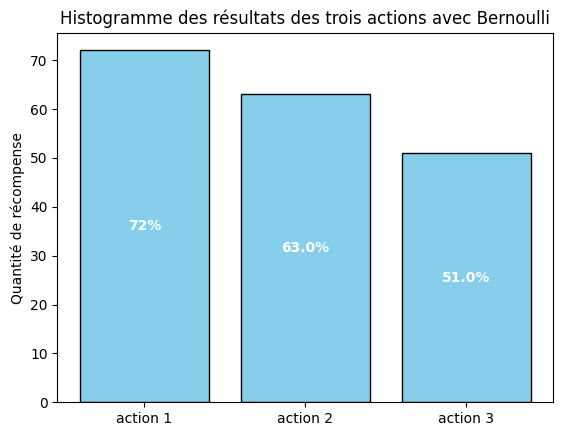

In [10]:
def jouerAction(action, nombreDeFois):
    resultat = np.array([])
    for i in range(nombreDeFois):
        resultat = np.append(resultat, bernoulliBandit.play(action))
    return resultat

nombreDeFois = 100

resultatAction1 = np.mean(jouerAction(0, nombreDeFois))
resultatAction2 = np.mean(jouerAction(1, nombreDeFois))
resultatAction3 = np.mean(jouerAction(2, nombreDeFois))

valeurs = [resultatAction1*100, resultatAction2*100, resultatAction3*100]
moyennes = [str(round(resultatAction1 * 100)) + "%", str(round(resultatAction2 * 100,1)) + "%", str(round(resultatAction3*100,1)) +"%"]
description = ['action 1', 'action 2', 'action 3']


x = np.arange(len(valeurs))

plt.bar(x, valeurs, color='skyblue', edgecolor='black')


for i, (v, desc) in enumerate(zip(valeurs, moyennes)):
    plt.text(i, v/2, desc, ha='center', va='center', color='white', fontsize=10, fontweight='bold')

plt.xticks(x, description)
plt.ylabel("Quantité de récompense")
plt.title("Histogramme des résultats des trois actions avec Bernoulli")

plt.show()

#### Récompenses de distributions normales

Complétez le code suivant pour implémenter un simulateur de bandit stochastique à $k$ actions avec récompenses générées par des distributions normales. Votre classe doit recevoir en entrée l'espérance et la variance des récompenses pour chaque action, ainsi qu'un germe aléatoire permettant de fixer la réalisation de l'instance. La fonction _play_ doit échantillonner et retourner une récompense pour l'action demandée.

In [56]:
class NormalBandit(BernoulliBandit):
    
    def __init__(self, means, variances, seed=None):
        self.means= means
        self.variances= variances
        self.rng = np.random.default_rng(seed)
    
    def play(self, action):
       return self.rng.normal(self.means[action], self.variances)

Générez une instance de votre environnement avec la configuration $\boldsymbol \mu = (0.7, 0.6, 0.5)$ et une variance de récompenses $\sigma^2 = 1$ pour toutes les actions.

In [57]:
means = np.array([0.7, 0.6, 0.5])
variance = 1
seed = 22
normalBandit = NormalBandit(means, variance, seed)
print(normalBandit.play(1))

-0.7976184247040431


Montrez que votre environnement fonctionne en jouant 100 fois chaque action sur votre instance. Collectez les récompenses et affichez la moyenne et la variance empiriques pour chaque action.

In [58]:
def jouerAction(action, nombreDeFois):
    resultat = np.array([])
    for i in range(nombreDeFois):
        resultat = np.append(resultat, normalBandit.play(action))
    return resultat

nombreDeFois = 100

resultatAction1 = jouerAction(0, nombreDeFois)
resultatAction2 = jouerAction(1, nombreDeFois)
resultatAction3 = jouerAction(2, nombreDeFois)

print("resultatAction1: " +" moyenne " + str(round(np.mean(resultatAction1),2)) + " variance: " + str(round(np.std(resultatAction1),2)))
print("resultatAction2: "  +" moyenne " + str(round(np.mean(resultatAction2),2)) + " variance: " + str(round(np.std(resultatAction2),2)))
print("resultatAction3: "  +" moyenne " + str(round(np.mean(resultatAction3),2)) + " variance: " + str(round(np.std(resultatAction3),2)))



resultatAction1:  moyenne 0.82 variance: 1.08
resultatAction2:  moyenne 0.57 variance: 0.9
resultatAction3:  moyenne 0.45 variance: 0.94


### [10 points] Explore-Then-Commit (ETC)

Complétez le code suivant pour implémenter la stratégie ETC. Votre fonction doit recevoir en entrée l'instance de bandit à aborder, la durée de l'horizon de temps $T$, ainsi que la durée $m$ de la phase exploratoire accordée pour chaque action.

In [13]:


def calculRecompenseExploration(m, action):
    totalRecompense = 0
    for t in range(m):
        totalRecompense += (bernoulliBandit.play(0).item())
    return totalRecompense

#test calculRecompenseExploration
#print ("recompense total  " + str(calculRecompenseExploration(50, 0)))

def selectionActionOptimal(quantiteRecompenseExploration):
    return np.argmax(quantiteRecompenseExploration)

#test actionAvecMaximumRecompense
#print("action max  " + str(actionAvecMaximumRecompense(np.array([25,50,100]))))


#etc retourne l'action choisie après la phase d'exploration
def etc(bandit, T, m):
    quantiteRecompenseExploration = np.zeros(3)
    gapSousOptimialiteInstantane = calculValeurOptimalBandit(bandit)

    for action in range(len(bandit)):
        quantiteRecompenseExploration[action] = calculRecompenseExploration(m, action) #fait l'exploration et retourne les actions sélectionnées'

    actionAvecMaxRecompense =np.argmax(quantiteRecompenseExploration)

    return actionAvecMaxRecompense


Considérez l'instance de bandits $\boldsymbol \mu = (0.7, 0.6, 0.5)$ avec récompenses générées par des distributions de Bernoulli. Appliquez la stratégie ETC sur $N=100$ réalisations de cette instance sur un horizon temporel $T = 2000$. Comparez ETC pour $m=50$ tirages exploratoires par action avec ETC pour $m$ optimal selon la théorie : $$m_\text{optimal} = \left\lceil \frac{4 \sigma^2}{\Delta_-^2} \ln \left( \frac{T \Delta_-^2}{4 \sigma^2} \right) \right\rceil \quad \text{avec } \Delta_- = \min_{a\neq a_\star} \Delta_a$$

Supposez que le gap de sous-optimalité minimal $\Delta_-$ est connu.

Présentez une figure montrant le pseudo-regret cumulatif moyenné sur les réalisations, avec un écart-type au-dessus, pour chaque configuration de la stratégie. Affichez le pourcentage des réalisations pour lesquelles chaque variante a pu exploiter l'action optimale.

## Réponse calcul m<sub>optimal</sub>
Hypothèse:

 - gap de sous optimalité (delta) : la plus petite différence entre les différentes espérances du Bandit
					soit 0,7 - 0,6 = 0,1
- variance utilisé est estimé à distribution Bernoulli soit 1/2-sous-Gaussienne. La variance est donc de 1/4.
- T = 1000
m<sub>optimal</sub> = 230.25

Il a été choisi d'arrondir à la valeur supérieure  soit 231

In [14]:
seed = 22
bandit = np.array([0.7, 0.6, 0.5])
bernoulliBandit = BernoulliBandit(bandit, seed)
T = 2000
m50 = 50
m231 = 231

def calculValeurOptimalBandit(bandit):
    valeurOptimale = np.max(bandit)
    return valeurOptimale

#test calculGapSousOptimalite
#print(calculGapSousOptimalite(bandit))

def calcuListeActionObtenueParRealisation(quantiteRealisation, m):
    listeActionChoisieRealisation = np.zeros(quantiteRealisation)
    for realisation in range(quantiteRealisation):
        listeActionChoisieRealisation[realisation] = etc(bandit, T, m)
    return listeActionChoisieRealisation

def calculMoyenneEtecartTypeGapSousOptimalite(actionChoisieParRealisation):
    esperanceAction = np.zeros(len(actionChoisieParRealisation))
    position = 0

    for actionChoisie in actionChoisieParRealisation:
        esperanceAction[position] = (bandit[int(actionChoisie)])
        position += 1

    listeGapSousOptimalite = calculValeurOptimalBandit(bandit)-esperanceAction

    return np.mean(listeGapSousOptimalite), np.std(listeGapSousOptimalite)

actionChoisieParRealisationPour100realisationsAvecM50 = calcuListeActionObtenueParRealisation(quantiteRealisation = 100, m = m50)
moyenneDesGapsAvecM50, ecartTypeDesGapsAvecM50 = calculMoyenneEtecartTypeGapSousOptimalite(actionChoisieParRealisationPour100realisationsAvecM50)

#ecartTypeSurLesEsperancesAvecM50 =

actionChoisieParRealisationPour100realisationsAvecM231  = calcuListeActionObtenueParRealisation(quantiteRealisation = 100, m = m231)
moyenneDesGapsAvecM231, ecartTypeDesGapsAvecM231 = calculMoyenneEtecartTypeGapSousOptimalite(actionChoisieParRealisationPour100realisationsAvecM231)

print(moyenneDesGapsAvecM50)
print(ecartTypeDesGapsAvecM50)
print(moyenneDesGapsAvecM231)
print(ecartTypeDesGapsAvecM231)


0.07299999999999998
0.07328710664230098
0.09499999999999999
0.0864580823289529


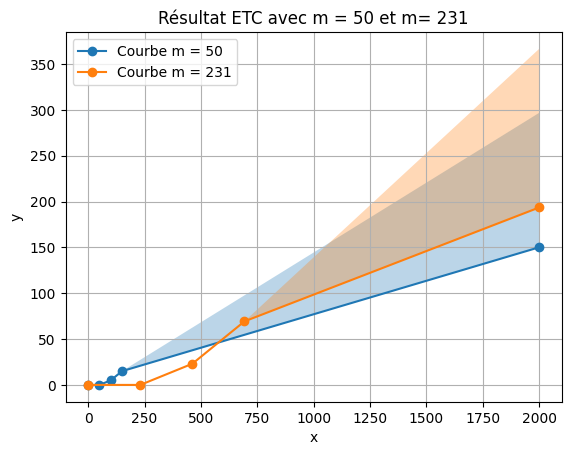

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#les  gap de sous optimialité sont des pentes et ces pentes changes en ces points

x50 = np.array([0, m50, m50*2, m50*3, 2000])
x231 = np.array([0, m231, m231 * 2, m231 * 3, 2000])

#l'ecart type s'applique uniquement sur le dernier intervalle et croit avec l'horizon

deltaX50 = x50[-1] - x50[0]
deltaX231 = x231[-1] - x231[0]

ecartType50 = np.zeros(len(x50))
ecartType231 = np.zeros(len(x231))


ecartType50[-1] = ecartTypeDesGapsAvecM50 * deltaX50
ecartType231[-1] = ecartTypeDesGapsAvecM231 * deltaX231

#pentes == gap de sous optimalité

pbandit1 = bandit[0]-bandit[0]
pbandit2 = bandit[0]-bandit[1]
pbandit3 = bandit[0]-bandit[2]
pentes_50 = [pbandit1, pbandit2, pbandit3, moyenneDesGapsAvecM50]
pente_231 = [pbandit1, pbandit2, pbandit3, moyenneDesGapsAvecM231]

regretCumulatif150 = [0]
regretCumulatif110 = [0]

for i in range(len(pentes_50)):
    dx = x50[i+1] - x50[i]
    regretCumulatif150.append(regretCumulatif150[-1] + pentes_50[i] * dx)


for i in range(len(pentes_50)):
    dx = x231[i + 1] - x231[i]
    regretCumulatif110.append(regretCumulatif110[-1] + pente_231[i] * dx)

plt.plot(x50, regretCumulatif150, marker='o', label="Courbe m = 50")
plt.fill_between(x50, regretCumulatif150, regretCumulatif150 + ecartType50, alpha=0.3)

plt.plot(x231, regretCumulatif110, marker='o', label="Courbe m = 231")
plt.fill_between(x231, regretCumulatif110, regretCumulatif110 + ecartType231, alpha=0.3)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Résultat ETC avec m = 50 et m= 231")
plt.legend()
plt.grid(True)
plt.show()


Expliquez les régimes observés sur les courbes ainsi que les différences entre les courbes. Supportez votre discussion à l'aide des taux de convergence à l'action optimale obtenus avec chaque valeur de $m$.

###########################
A Faire
###########################

__[IFT-7201]__ Montrez comment obtenir l'équation de $m$ optimal sur un environnement à $k = 3$ actions.

### [10 points] $\varepsilon$-greedy

Complétez le code suivant pour implémenter la stratégie $\varepsilon$-greedy avec taux d'exploration $\varepsilon$ fixe. Votre fonction doit recevoir en entrée l'instance de bandit à aborder, la durée de l'horizon de temps $T$, ainsi que le taux d'exploration $\varepsilon$.

In [62]:
def miseAjourMoyenneEmpirique(quantiteActionChoisie, recompenseCumule):
    return recompenseCumule/quantiteActionChoisie

def selectionAleatoireAction(bandit):
    action = np.random.choice(len(bandit))
    return action

def egreedy(bandit, T, epsilon):

    actionOptimal = selectionActionOptimal(bandit)
    esperanceActionOptimal = bandit[actionOptimal]
    quantiteActionChoisie = np.zeros(len(bandit)) #Na
    recompenseCumule = np.zeros(len(bandit)) # Sa
    gapCumulatif = np.zeros(T+1)
    compteurActionOptimal = 0

    #initialisation chaque action est jouée une fois
    compteur = 0
    for action in range(len(bandit)):
        quantiteActionChoisie[compteur] =+ 1
        recompenseCumule[compteur] = (bernoulliBandit.play(action)[0])
        gapCumulatif[compteur + 1] = esperanceActionOptimal - bandit[action] + gapCumulatif[compteur]
        compteur += 1
        compteurActionOptimal += 1

    #exploration basée sur epsilon

    for pasDeTemps in range(T - len(bandit)):
        probabilite = np.random.uniform(0,1)
        if (epsilon > probabilite):
            action = selectionAleatoireAction(bandit)
        else:
            moyenneEmpirique = miseAjourMoyenneEmpirique(quantiteActionChoisie, recompenseCumule)
            action = np.argmax(moyenneEmpirique)

        if (action == actionOptimal):
            compteurActionOptimal += 1

        quantiteActionChoisie[action] =+ 1
        recompenseCumule[action] =+ (bernoulliBandit.play(action)[0])
        gapCumulatif[compteur + 1] = esperanceActionOptimal - bandit[action] + gapCumulatif[compteur]
        compteur += 1

    return gapCumulatif, compteurActionOptimal #gap de sous optimalité par pas de temps

Considérez l'instance de bandits $\boldsymbol \mu = (0.7, 0.6, 0.5)$ avec récompenses générées par des distributions de Bernoulli. Appliquez la stratégie $\varepsilon$-greedy sur $N=100$ réalisations de cette instance sur un horizon temporel $T = 1000$. Comparez $\varepsilon$-greedy pour $\varepsilon \in \{0, 1/8, 1/4, 1/2, 1\}$.

Présentez une figure montrant le pseudo-regret cumulatif moyenné sur les réalisations, avec un écart-type au-dessus, pour chaque configuration de la stratégie. Affichez le nombre de fois en moyenne (avec un écart-type) où l'action optimale est sélectionnée sur l'instance considérée avec chaque configuration de la stratégie. 

In [63]:
def applicationStrategieEgreedy(realisation, bandit, epsilon,T):
    listeRealisation =[]
    compteurActionOptimal = []
    for r in range(realisation):
        gapCumulatif, actionsOptimal = egreedy(bandit, T, epsilon)
        listeRealisation.append(gapCumulatif)
        compteurActionOptimal.append(actionsOptimal)
    moyenneGap = np.mean(listeRealisation, axis = 0)
    ecartTypeGap = np.std(listeRealisation, axis = 0)
    moyenneActionOptimal = np.mean(compteurActionOptimal)
    ecartTypeActionOptimal = np.std(compteurActionOptimal)

    return (moyenneGap, ecartTypeGap, moyenneActionOptimal, ecartTypeActionOptimal)

bandit = np.array([0.7, 0.6, 0.5])
seed = 22
np.random.seed(seed)
bernoulliBandit = BernoulliBandit(np.array([0.7, 0.6, 0.5]), seed)

T = 1000
realisation = 5

resultatEpsilon0 =  applicationStrategieEgreedy(realisation = realisation, bandit = bandit, epsilon = 0, T = T)
resultatEpsilon18 =  applicationStrategieEgreedy(realisation = realisation, bandit = bandit, epsilon = 1/8, T = T)
resultatEpsilon14 =  applicationStrategieEgreedy(realisation = realisation, bandit = bandit, epsilon = 1/4, T = T)
resultatEpsilon12 =  applicationStrategieEgreedy(realisation = realisation, bandit = bandit, epsilon = 1/2, T = T)
resultatEpsilon1 =  applicationStrategieEgreedy(realisation = realisation, bandit = bandit, epsilon = 1, T = T)

print(resultatEpsilon0[2])
print(resultatEpsilon18[2])
print(resultatEpsilon14[2])
print(resultatEpsilon12[2])
print(resultatEpsilon1[2])

997.8
835.8
704.4
523.6
332.8


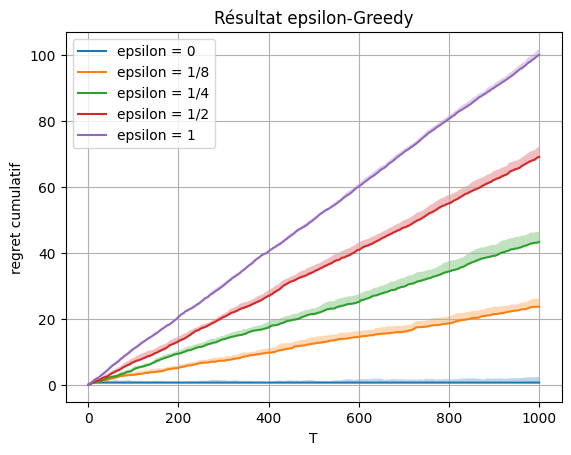

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# points
x = np.arange(0, T + 1, 1)


regretCumulatif150 = resultatEpsilon0[0]
regretCumulatif110 = resultatEpsilon18[0]
gapCumulatif14 = resultatEpsilon14[0]
gapCumulatif12 = resultatEpsilon12[0]
gapCumulatif1 = resultatEpsilon1[0]

ecartType150 = resultatEpsilon0[1]
ecartType110 = resultatEpsilon18[1]
ecartType14 = resultatEpsilon14[1]
ecartType12 = resultatEpsilon12[1]
ecartType1 = resultatEpsilon1[1]

# tracé
plt.plot(x, regretCumulatif150, label="epsilon = 0")
plt.fill_between(x, regretCumulatif150, regretCumulatif150 + ecartType1, alpha=0.3)

plt.plot(x, regretCumulatif110, label="epsilon = 1/8")
plt.fill_between(x, regretCumulatif110, regretCumulatif110 + ecartType110, alpha=0.3)

plt.plot(x, gapCumulatif14, label="epsilon = 1/4")
plt.fill_between(x, gapCumulatif14, gapCumulatif14 + ecartType14, alpha=0.3)

plt.plot(x, gapCumulatif12, label="epsilon = 1/2")
plt.fill_between(x, gapCumulatif12, gapCumulatif12 + ecartType12, alpha=0.3)

plt.plot(x, gapCumulatif1, label="epsilon = 1")
plt.fill_between(x, gapCumulatif1, gapCumulatif1 + ecartType1, alpha=0.3)

plt.xlabel("T")
plt.ylabel("regret cumulatif")
plt.title("Résultat epsilon-Greedy")
plt.legend()
plt.grid(True)
plt.show()


Expliquez les différences observées entre les courbes. Expliquez les nombres de tirages de l'action optimale en référant aux bornes inférieures sur le pseudo-regret cumulatif de la stratégie $\varepsilon$-greedy pour les configurations $\varepsilon = 0$ et $\varepsilon = 1$.

### [10 points] UCB

Complétez le code suivant pour implémenter la stratégie UCB1 (Auer et al., 2002). Votre fonction doit recevoir en entrée l'instance de bandit à aborder ainsi que la durée de l'horizon de temps $T$.

In [19]:
def calculUCB1(quantiteActionChoisie, recompenseCumule, t):
    moyenneEmpiriqueParAction = recompenseCumule/quantiteActionChoisie
    ucb = moyenneEmpiriqueParAction + np.sqrt(2 * np.log(t)/quantiteActionChoisie)
    return np.argmax(ucb)

def ucb1(bandit, T):

    actionOptimal = selectionActionOptimal(bandit)
    esperanceActionOptimal = bandit[actionOptimal]
    quantiteActionChoisie = np.zeros(len(bandit)) #Na
    recompenseCumule = np.zeros(len(bandit)) # Sa
    gapCumulatif = np.zeros(T+1)

    #initialisation chaque action est jouée une fois
    compteur = 1
    for action in range(len(bandit)):
        quantiteActionChoisie[compteur-1] =+ 1
        recompenseCumule[compteur-1] = (bernoulliBandit.play(action)[0])
        gapCumulatif[compteur] = esperanceActionOptimal - bandit[action] + gapCumulatif[compteur-1]
        compteur += 1

    for pasDeTemps in range(T - len(bandit)):

        action = calculUCB1(quantiteActionChoisie, recompenseCumule, compteur)
        quantiteActionChoisie[action] =+ 1
        recompenseCumule[action] =+ (bernoulliBandit.play(action)[0])
        gapCumulatif[compteur] = esperanceActionOptimal - bandit[action] + gapCumulatif[compteur-1]
        compteur +=1

    return gapCumulatif #gap de sous optimalité par pas de temps


Considérez l'instance de bandits $\boldsymbol \mu = (0.7, 0.6, 0.5)$ avec récompenses générées par des distributions de Bernoulli. Appliquez la stratégie UCB1 sur $N=100$ réalisations de cette instance sur un horizon temporel $T = 1000$.

Présentez une figure montrant le pseudo-regret cumulatif moyenné sur les réalisations, avec un écart-type au-dessus.

In [20]:
def applicationStrategieUCB1(realisation, bandit, T):
    listeRealisation =[]
    for r in range(realisation):
        regretCumulatif = ucb1(bandit, T)
        listeRealisation.append(regretCumulatif)
    moyenneRegretCumulatif = np.mean(listeRealisation, axis = 0)
    ecartTypeRegretCumulatif = np.std(listeRealisation, axis = 0)

    return (moyenneRegretCumulatif, ecartTypeRegretCumulatif)

bandit = np.array([0.7, 0.6, 0.5])
seed = 22
T = 1000
realisation = 100
np.random.seed(seed)
bernoulliBandit = BernoulliBandit(np.array([0.7, 0.6, 0.5]), seed)

moyenneRegretCumulatif, ecartTypeRegretCumulatif = applicationStrategieUCB1(realisation, bandit, T)

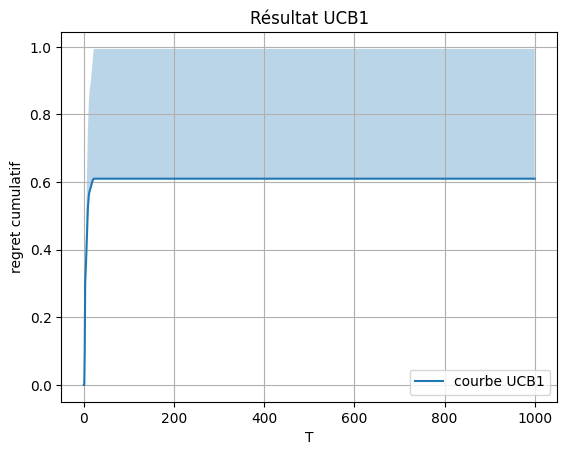

In [21]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, T + 1, 1)

plt.plot(x, moyenneRegretCumulatif, label="courbe UCB1")
plt.fill_between(x, moyenneRegretCumulatif, moyenneRegretCumulatif + ecartTypeRegretCumulatif, alpha=0.3)

plt.xlabel("T")
plt.ylabel("regret cumulatif")
plt.title("Résultat UCB1")
plt.legend()
plt.grid(True)
plt.show()

Expliquez la forme de la courbe obtenue.

### [10 points] Thompson Sampling (TS)

Complétez le code suivant pour implémenter la stratégie TS destinée à des bandits stochastiques dont les récompenses suivent des distributions normales de variance connue $\sigma^2$. Votre fonction doit recevoir en entrée l'instance de bandit à aborder, la durée de l'horizon de temps $T$, la valeur des paramètres a priori ($\mu_0$ et $\sigma_0$), ainsi que la variance des observations ($\sigma^2$).

In [22]:

def intialiserBanditNormale(tailleBandit, seed):
    rng = np.random.default_rng(seed)
    bandit = np.zeros(tailleBandit)
    for action  in range(tailleBandit):
        bandit[action] = rng.uniform(0,1)
    return bandit


# seed = 22
# tailleBandit = 10
#
# print(intialiserBanditNormale(tailleBandit, seed))
# print(intialiserBanditNormale(tailleBandit, seed+1))

def miseAjourDistributionAprioriNormale(compteurAction, compteurRecompense, distributionApriori, actionCourante, sigmaRecompense):
    moyenPriori = distributionApriori[actionCourante][0]
    variancePriori = distributionApriori[actionCourante][1]

    nouvelleMoyenne = ((moyenPriori/variancePriori + compteurRecompense[actionCourante])/(1/variancePriori + compteurAction[actionCourante]/sigmaRecompense))

    nouvelleVariance = (1/(1/variancePriori + compteurRecompense[actionCourante]/sigmaRecompense))

    distributionApriori[actionCourante][0] = nouvelleMoyenne
    distributionApriori[actionCourante][1] = nouvelleVariance

    return distributionApriori


# mu_0_test = 2
# sigma_0_test = 3
# sigmaRecompense = 1
#
# distribtionApriori = np.array([[mu_0_test,sigma_0_test]] * 5, dtype=float)
# print(distribtionApriori.shape)
# actionJouee = 2
# compteurRecompense = np.array([2, 3, 4])
# compteurAction = np.array([1, 2, 4])
# miseAjourDistributionAprioriNormale(compteurAction, compteurRecompense, distribtionApriori, actionJouee, sigmaRecompense)



def ts_normal(bandit, T, mu_0, sigma_0, sigma):

    seed = 22
    normalBandit = NormalBandit(bandit,sigma, seed)
    actionOptimal = selectionActionOptimal(bandit)
    esperanceActionOptimal = bandit[actionOptimal]
    regretCumulatif = np.zeros(T+1)
    distributionApriori = np.array([[mu_0,sigma_0]] * len(bandit), dtype=float) #initialisation distribution

    compteurActionJouee = np.zeros(len(bandit))
    compteurRecompense = np.zeros(len(bandit))

    for temps in range(1, T + 1):
        actionCourante = np.argmax(distributionApriori[:, 0])
        recompense = normalBandit.play(actionCourante)
        compteurRecompense[actionCourante] += recompense
        regretCumulatif[temps] = esperanceActionOptimal - bandit[actionCourante] + regretCumulatif[temps-1]

        distributionApriori = miseAjourDistributionAprioriNormale(compteurActionJouee, compteurRecompense, distributionApriori, actionCourante, sigma)

        compteurActionJouee[actionCourante] += 1

    return regretCumulatif, compteurActionJouee



# tailleBandit = 10
# mu_0 = 0.9
# sigma_0 = 0.5
# sigma = 1
# T = 5
# bandit = intialiserBanditNormale(tailleBandit, seed) #initialisation bandit
#
# seed = 22
# normalBandit = NormalBandit(bandit,sigma, seed)
#
# ts_normal(bandit, T, mu_0, sigma_0, sigma)
# print(bandit)


Considérez la classe d'environnements à 10 actions dont les récompenses suivent des distributions normales de variance $\sigma^2 = 1$ et dont les configurations sont telles que $\mu_a \sim \mathcal N(2, 1)$. Appliquez la stratégie TS à 100 instances de cette classe (une réalisation par instance) sur un horizon temporel $T = 1000$.

Présentez une figure montrant le pseudo-regret cumulatif moyenné sur les réalisations, avec un écart-type au-dessus.

In [23]:
def applicationStrategieTS(realisation, T, mu_0, sigma_0, sigma, seed):
    listeRealisation = []

    for r in range(realisation):
        bandit = intialiserBanditNormale(tailleBandit, seed) #initialisation bandit

        regretCumulatif, compteurActionJouee  = ts_normal(bandit, T, mu_0, sigma_0, sigma)
        listeRealisation.append(regretCumulatif)
        seed += 1
    moyenneRegretCumulatif = np.mean(listeRealisation, axis = 0)
    ecartTypeRegretCumulatif = np.std(listeRealisation, axis = 0)

    return (moyenneRegretCumulatif, ecartTypeRegretCumulatif)

tailleBandit = 10
mu_0 = 50
sigma_0 = 1
sigma = 1
T = 1000
realisation = 100
seed = 22


resultatStrategieTS = applicationStrategieTS(realisation, T, mu_0, sigma_0, sigma, seed)

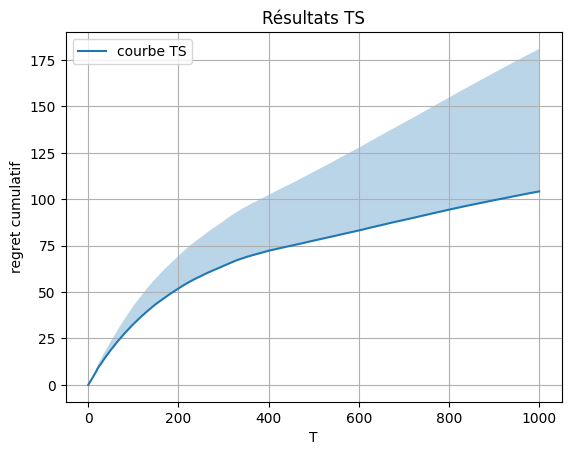

In [24]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, T + 1, 1)

plt.plot(x, resultatStrategieTS[0], label="courbe TS")
plt.fill_between(x, resultatStrategieTS[0], resultatStrategieTS[0] + resultatStrategieTS[1], alpha=0.3)

plt.xlabel("T")
plt.ylabel("regret cumulatif")
plt.title("Résultats TS")
plt.legend()
plt.grid(True)
plt.show()

Justifiez le choix des paramètres a priori utilisés dans votre expérience.

## Réponse à refaire


### [10 points] Apprentissage par le gradient de la politique

Complétez le code suivant pour implémenter la stratégie d'apprentissage par gradient de la politique avec _baseline_ $B_t$ correspondant à la moyenne des récompenses observées jusqu'au temps $t-1$. Votre fonction doit recevoir en entrée l'instance de bandit à aborder, la durée de l'horizon de temps $T$, ainsi que le taux d'apprentissage $\alpha > 0$.

In [25]:
def policy_gradient(bandit, T, alpha):
    seed = 22
    sigma = 1
    normalBandit = NormalBandit(bandit,sigma, seed)
    actionOptimal = selectionActionOptimal(bandit)
    esperanceActionOptimal = bandit[actionOptimal]
    regretCumulatif = np.zeros(T+1)
    H = np.zeros(len(bandit))
    recompenses = []
    compteurActionJouee = np.zeros(len(bandit)) #temporaire

    for pasDeTemps in range(1, T+1):
        politique = np.exp(H)/np.sum(np.exp(H))
        #actionCourante  = np.argmax(politique)
        rng = np.random.default_rng(seed)
        actionCourante = rng.choice(len(bandit), p =politique)
        recompense = normalBandit.play(actionCourante)
        recompenses.append(recompense)
        baseline = np.mean(recompenses)
        H[actionCourante] =H[actionCourante] + alpha * (recompense - baseline) * (1 - politique[actionCourante])
        for action in range(len(H)):
            if (action != actionCourante):
                H[action] = H[action] - alpha * (recompense - baseline) * politique[action]
        regretCumulatif[pasDeTemps] = esperanceActionOptimal - bandit[actionCourante] + regretCumulatif[pasDeTemps-1]

        seed += 1
        compteurActionJouee[actionCourante] += 1
        #print("baseline =  ", baseline)
    # print("H =  ", H)
    # print(compteurActionJouee)
    return regretCumulatif


# tailleBandit = 10
# seed = 24
# sigma = 1
#
# bandit = intialiserBanditNormale(tailleBandit, seed)
# T = 2000
# print (bandit)
# policy_gradient(bandit, T, 0.1)

Considérez la classe d'environnements à 10 actions dont les récompenses suivent des distributions normales de variance $\sigma^2 = 1$ et dont les configurations sont telles que $\mu_a \sim \mathcal N(0, 1)$. Appliquez la stratégie d'apprentissage par gradient de politique à 100 instances de cette classe (une réalisation par instance) sur un horizon temporel $T = 2000$ avec différentes valeurs de taux d'apprentissage $\alpha \in \{ 1/50, 1/10, 1/2 \}$.

Présentez une figure montrant le pseudo-regret cumulatif moyenné sur les réalisations, avec un écart-type au-dessus, pour chaque configuration de la stratégie.

In [67]:
def applicationStrategiePolicyGradient(realisation, T, tailleBandit, seed, alpha):
    listeRealisation = []

    for r in range(realisation):
        bandit = intialiserBanditNormale(tailleBandit, seed) #initialisation bandit
        regretCumulatif = policy_gradient(bandit, T, alpha)
        listeRealisation.append(regretCumulatif)
        seed += 1
    moyenneRegretCumulatif = np.mean(listeRealisation, axis = 0)
    ecartTypeRegretCumulatif = np.std(listeRealisation, axis = 0)

    return (moyenneRegretCumulatif, ecartTypeRegretCumulatif)

tailleBandit = 10
T = 4000
realisation = 100
seed = 22

resultatPolicyGradientAlpha150 = applicationStrategiePolicyGradient(realisation, T, tailleBandit, seed, alpha = 1/50)
resultatPolicyGradientAlpha110 = applicationStrategiePolicyGradient(realisation, T, tailleBandit, seed, alpha = 1/10)
resultatPolicyGradientAlpha12 = applicationStrategiePolicyGradient(realisation, T, tailleBandit, seed, alpha = 1/2)

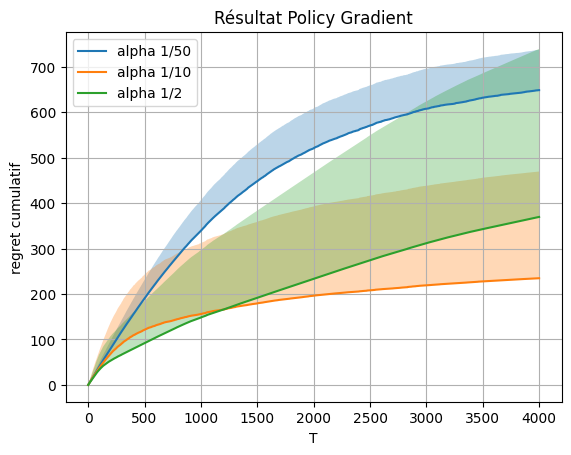

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# points
x = np.arange(0, T + 1, 1)


regretCumulatif150 = resultatPolicyGradientAlpha150[0]
regretCumulatif110 = resultatPolicyGradientAlpha110[0]
regretCumulatif12  = resultatPolicyGradientAlpha12[0]

ecartType150 = resultatPolicyGradientAlpha150[1]
ecartType110 = resultatPolicyGradientAlpha110[0]
ecartType12 = resultatPolicyGradientAlpha12[0]


# tracé
plt.plot(x, regretCumulatif150, label="alpha 1/50")
plt.fill_between(x, regretCumulatif150, regretCumulatif150 + ecartType150, alpha=0.3)

plt.plot(x, regretCumulatif110, label="alpha 1/10")
plt.fill_between(x, regretCumulatif110, regretCumulatif110 + ecartType110, alpha=0.3)

plt.plot(x, regretCumulatif12, label="alpha 1/2")
plt.fill_between(x, regretCumulatif12, regretCumulatif12 + ecartType12, alpha=0.3)



plt.xlabel("T")
plt.ylabel("regret cumulatif")
plt.title("Résultat Policy Gradient")
plt.legend()
plt.grid(True)
plt.show()

Discutez de l'impact du taux d'apprentissage en vous appuyant sur les résultats obtenus. Expliquez notamment la forme des courbes en référant au compromis entre l'exploration et l'exploitation.

## Les bandits stochastiques contextuels

### [10 points] Les environnements de bandits stochastiques linéaires

Vous travaillez dans une entreprise comprenant différents systèmes qui mériteraient d'être optimisés. Vous aimeriez investiguer le potentiel des stratégies de bandits stochastiques linéaires pour aborder la tâche d'ajustement des paramètres d'un système de manière à maximiser sa performance.

Complétez le code suivant pour implémenter un simulateur générique permettant de réaliser des expériences sur des problèmes de bandits stochastiques linéaires adaptés à cette application. Considérez que chaque récompense $R_t$ est générée en appliquant un bruit $\eta_t \sim \mathcal N(0, \sigma^2)$ à la fonction de performance évaluée à l'action $A_t$. Votre classe doit recevoir en entrée la fonction de caractéristiques à utiliser, le paramètre $\omega_\star$ gouvernant la fonction de récompense, la variance du bruit $\sigma^2$, la liste des actions discrètres considérées ($x_1, x_2, \dots, x_k$), ainsi qu'un germe aléatoire permettant de fixer la réalisation de l'instance. La fonction _play_ doit échantillonner et retourner une récompense pour l'action d'indice donné.

In [28]:
class LinGaussianBandit:
    def __init__(self, phi, omega, noise_variance, action_space, seed=None):
        self.phi = phi
        self.omega = omega
        self.noise_variance = noise_variance
        self.action_space = action_space
        self.rng = np.random.default_rng(seed)
        pass

    def play(self, action):
        phiCalcule = np.zeros(len(self.phi))
        for i in range(0,len(phi)):
            phiCalcule[i] = action_space[action]**self.phi[i]
        recompense = self.omega @ phiCalcule
        #print(recompense)
        return recompense + self.rng.normal(0, self.noise_variance)


Considérez une instance spécifique de cet environnement caractérisée par une variance du bruit $\sigma^2 = 0.01$, un espace d'action $\mathcal X$ fini et discret correspondant à 100 valeurs régulièrement espacées sur l'intervalle $[0, 1]$, la fonction de caractéristique $\varphi(x) = (1, x, x^2, x^3, x^4, x^5, x^6, x^7)$, ainsi que le paramètre $\omega_\star$ suivant :

In [29]:
omega = np.array([0.41218989, 0.51717332, 0.40751546, 0.03405839, -0.29501341, -0.53931605, -0.07674824, -0.10778418])

Pour montrer que votre environnement fonctionne, présentez une réalisation de cette instance pour 50 actions sélectionnées aléatoirement sur $\mathcal X$. Votre figure devrait contenir la fonction de récompense attendue en plus des récompenses échantillonnées.

In [30]:
phi = np.array([0,1,2,3,4,5,6,7])
action_space = np.linspace(0,1,100)

#calcul récompense optimal attendue


recompenses = []
for action in action_space:
    phiCalcule = np.zeros(len(phi))
    for i in range(0,len(phi)):
        phiCalcule[i] = action**phi[i]
    recompenses.append(omega @ phiCalcule)



In [31]:
seed = 22
rng = np.random.default_rng(seed)
noise_variance = 0.01
linGaussianBandit = LinGaussianBandit(phi, omega, noise_variance, action_space, seed)
listeValeurAction = np.zeros(50)
listeRecompense = np.zeros(50)
for i in range(0, 50):
    actionJouee = rng.integers(0, len(action_space)-1)
    listeValeurAction[i] = action_space[actionJouee]
    listeRecompense[i] = linGaussianBandit.play(actionJouee)
print("====================================================")
print(np.mean(listeRecompense))
print("====================================================")
indices = np.argsort(listeValeurAction)
listeValeurAction = listeValeurAction[indices]
listeRecompense = listeRecompense[indices]

0.6320345673119151


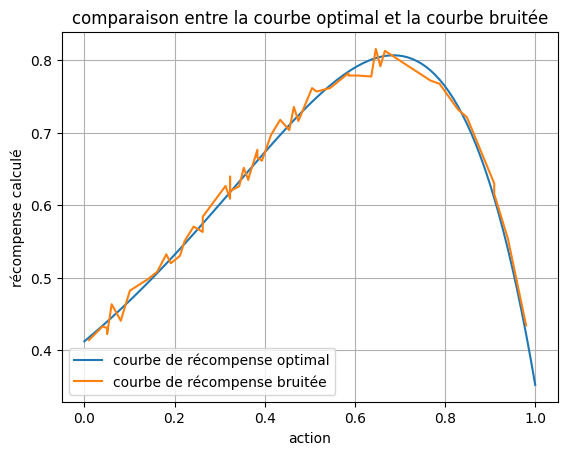

In [32]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(action_space, recompenses, label = "courbe de récompense optimal")
plt.plot(listeValeurAction, listeRecompense, label = "courbe de récompense bruitée")


plt.xlabel("action")
plt.ylabel("récompense calculé")
plt.title("comparaison entre la courbe optimal et la courbe bruitée")
plt.legend()
plt.grid(True)
plt.show()

À quoi pourrait correspondre le bruit dans cette application?

### [15 points] OFUL

Complétez le code suivant pour implémenter la stratégie OFUL adaptée au type d'environnement décrit précédemment. Votre fonction doit recevoir en entrée l'instance de bandits stochastiques linéaires à aborder, la durée de l'horizon de temps $T$, le paramètre de régularisation $\lambda$, la variance du bruit $\sigma^2$, ainsi que la norme $\lVert \omega_\star \rVert_2$. Considérez que la première action effectuée ($A_1$) est choisie aléatoirement uniformément sur l'espace des actions et utilisez un niveau de confiance $\delta = 1/t$.

In [51]:
def phi_St_a_Calcule(action, action_space, phi):
    phiCalcule = np.zeros(len(phi))
    for i in range(0,len(phi)):
        phiCalcule[i] = action_space[action]**phi[i]
    return phiCalcule

def calculVecteurCaracteristique(action_space, phi):
    vecteurCaracteristic = np.zeros((len(action_space), len(phi)))
    for action in range(0,len(action_space)):
        vecteurCaracteristic[action] = phi_St_a_Calcule(action, action_space, phi)
    return vecteurCaracteristic


In [53]:
def oful(bandit, T, regularisation, noise_variance, norm_function):
    phi = np.array([0,1,2,3,4,5,6,7])

    omegaEtoile = np.array([0.41218989, 0.51717332, 0.40751546, 0.03405839, -0.29501341, -0.53931605, -0.07674824, -0.10778418])
    normeOmega = norm_function
    seed = 22
    linGaussianBandit = LinGaussianBandit(phi, omegaEtoile, noise_variance, bandit, seed)

    action_space = bandit
    d = len(omegaEtoile)
    sigma = 0.1 #à modifier
    Vt = (1 + regularisation * np.eye(d))
    b = np.zeros(len(omegaEtoile))

    rng = np.random.default_rng(seed)
    actionCourante = rng.choice(len(bandit))
    listeRegretCumulatif = np.zeros(T+1)
    vecteurCharacteristiques = calculVecteurCaracteristique(action_space, phi)
    normeVecteurCharacteristic = np.linalg.norm(vecteurCharacteristiques, axis = 1)
    L = np.max(normeVecteurCharacteristic)

    for pasDeTemps in range(1, T + 1):

        if pasDeTemps == 1 :

            recompenseActionCourante = linGaussianBandit.play(actionCourante)
            phiActuel = vecteurCharacteristiques[actionCourante]
            Vt += np.outer(phiActuel, phiActuel)
            b += recompenseActionCourante * phiActuel
            recompenseOptimale = np.max(vecteurCharacteristiques @ omegaEtoile)
            regretInstantane = recompenseOptimale - (phiActuel @ omegaEtoile)
            listeRegretCumulatif[pasDeTemps] = regretInstantane+ listeRegretCumulatif[pasDeTemps - 1]

        if (pasDeTemps > 1):

            #calcul nouvelle action=========================================================================================
            estimationOmega = np.linalg.solve(Vt, b)

            delta = 1/pasDeTemps
            L = np.max(normeVecteurCharacteristic)
            termeSpecial = (sigma * np.sqrt(d * np.log((1 + (pasDeTemps - 1)*L**2/regularisation)/delta)) + np.sqrt(regularisation) * normeOmega)
            produitScalaire = vecteurCharacteristiques @ estimationOmega
            V_inv = np.linalg.inv(Vt)
            normePonderee = np.sqrt(np.sum((vecteurCharacteristiques @ V_inv) * vecteurCharacteristiques, axis = 1))

            actionCourante = np.argmax(produitScalaire + normePonderee * termeSpecial)
            #calcul nouvelle action==========================================================================================

            recompenseActionCourante = linGaussianBandit.play(actionCourante)

            phiActuel = vecteurCharacteristiques[actionCourante]
            Vt += np.outer(phiActuel, phiActuel)
            b += recompenseActionCourante * phiActuel

            recompenseOptimale = np.max(vecteurCharacteristiques @ omegaEtoile)
            regretInstantane = recompenseOptimale - (phiActuel @ omegaEtoile)
            listeRegretCumulatif[pasDeTemps] = regretInstantane+ listeRegretCumulatif[pasDeTemps - 1]

    return listeRegretCumulatif


Comment se traduit le niveau de confiance $\delta$ considéré sur les intervalles de confiance considérés?

Réponse: l'intervalle de confiance grandit en ln(t^2)

Appliquez la stratégie OFUL sur $N=100$ réalisations de l'instance de bandits stochastiques linéaires décrite précédemment, sur un horizon temporel $T = 1000$ en supposant que la variance du bruit $\sigma^2$ et la norme $\lVert \omega_\star \rVert_2$ sont des informations connues. Investiguez l'impact de la régularisation en considérant $\lambda \in \{ 0.001, 0.01, 0.1, 1 \}$.

Présentez vos résultats sous la forme de figures montrant le pseudo-regret cumulatif moyenné sur les réalisations, avec un écart-type au-dessus.

In [54]:
def applicationStrategieOFUL(realisation, T, tailleBandit, seed, regularisation):
    noise_variance = 0.01
    norm_function = 1
    listeRealisation = []

    for r in range(realisation):
        print("realisation = ", r)
        bandit = np.linspace(0,1,tailleBandit) #initialisation bandit
        regretCumulatif = oful(bandit, T, regularisation, noise_variance, norm_function)
        listeRealisation.append(regretCumulatif)
        seed += 1
    moyenneRegretCumulatif = np.mean(listeRealisation, axis = 0)
    ecartTypeRegretCumulatif = np.std(listeRealisation, axis = 0)

    return (moyenneRegretCumulatif, ecartTypeRegretCumulatif)

tailleBandit = 100
T = 1000
realisation = 100
seed = 22
regularisation = 10

moyenneRegretCumulatifLamda0001, ecartTypeRegretCumulatif0001 = applicationStrategieOFUL(realisation, T, tailleBandit, seed, regularisation = 0.001)
moyenneRegretCumulatifLamda001, ecartTypeRegretCumulatif001 = applicationStrategieOFUL(realisation, T, tailleBandit, seed, regularisation = 0.01)
moyenneRegretCumulatifLamda01, ecartTypeRegretCumulatif01 = applicationStrategieOFUL(realisation, T, tailleBandit, seed, regularisation = 0.1)
moyenneRegretCumulatifLamda1, ecartTypeRegretCumulatif1 = applicationStrategieOFUL(realisation, T, tailleBandit, seed, regularisation = 1)

realisation =  0
realisation =  1
realisation =  2
realisation =  3
realisation =  4
realisation =  5
realisation =  6
realisation =  7
realisation =  8
realisation =  9
realisation =  10
realisation =  11
realisation =  12
realisation =  13
realisation =  14
realisation =  15
realisation =  16
realisation =  17
realisation =  18
realisation =  19
realisation =  20
realisation =  21
realisation =  22
realisation =  23
realisation =  24
realisation =  25
realisation =  26
realisation =  27
realisation =  28
realisation =  29
realisation =  30
realisation =  31
realisation =  32
realisation =  33
realisation =  34
realisation =  35
realisation =  36
realisation =  37
realisation =  38
realisation =  39
realisation =  40
realisation =  41
realisation =  42
realisation =  43
realisation =  44
realisation =  45
realisation =  46
realisation =  47
realisation =  48
realisation =  49
realisation =  50
realisation =  51
realisation =  52
realisation =  53
realisation =  54
realisation =  55
re

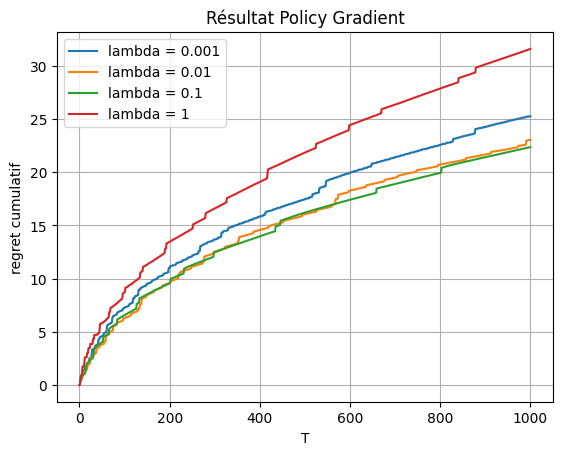

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# points
x = np.arange(0, T + 1, 1)



# tracé
plt.plot(x, moyenneRegretCumulatifLamda0001, label="lambda = 0.001")
plt.fill_between(x, moyenneRegretCumulatifLamda0001, moyenneRegretCumulatifLamda0001 + ecartTypeRegretCumulatif0001, alpha=0.3)

plt.plot(x, moyenneRegretCumulatifLamda001, label="lambda = 0.01")
plt.fill_between(x, moyenneRegretCumulatifLamda001, moyenneRegretCumulatifLamda001 + ecartTypeRegretCumulatif001, alpha=0.3)

plt.plot(x, moyenneRegretCumulatifLamda01, label="lambda = 0.1")
plt.fill_between(x, moyenneRegretCumulatifLamda01, moyenneRegretCumulatifLamda01 + ecartTypeRegretCumulatif01, alpha=0.3)

plt.plot(x, moyenneRegretCumulatifLamda1, label="lambda = 1")
plt.fill_between(x, moyenneRegretCumulatifLamda1, moyenneRegretCumulatifLamda1 + ecartTypeRegretCumulatif1, alpha=0.3)



plt.xlabel("T")
plt.ylabel("regret cumulatif")
plt.title("Résultat Policy Gradient")
plt.legend()
plt.grid(True)
plt.show()

Expliquez les résultats obtenus.

__[IFT-7201]__ En pratique, il peut arriver que la variance du bruit soit inconnue, donc qu'une estimation soit utilisée. Expliquez quel sera l'impact sur l'exploration et l'exploitation si la variance du bruit est sous/sur-estimée.

In [ ]:
Problème de sur ou sous apprentissage

### [15 points] TS pour bandits stochastiques linéaires

Complétez le code suivant pour implémenter une stratégie TS linéaire adaptée au type d'environnement décrit précédemment. Votre fonction doit recevoir en entrée l'instance de bandits stochastiques linéaires à aborder, la durée de l'horizon de temps $T$, le paramètre de régularisation $\lambda$, ainsi que la variance du bruit $\sigma^2$. Considérez que la première action effectuée ($A_1$) est choisie aléatoirement uniformément sur l'espace des actions.

In [ ]:
def lints(bandit, T, regularization, noise_variance):
    # compléter
    pass

Appliquez la stratégie LinTS sur $N=100$ réalisations de l'instance de bandits décrite précédemment, sur un horizon temporel $T = 1000$ en supposant que la variance du bruit est connue. Investiguez l'impact de la régularisation en considérant $\lambda \in \{ 0.001, 0.01, 0.1, 1 \}$.

Présentez vos résultats sous la forme de figures montrant le pseudo-regret cumulatif moyenné sur les réalisations, avec un écart-type au-dessus.

Discutez des résultats obtenus en comparaison avec les résultats obtenus en utilisant la stratégie OFUL.